In [593]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from networkx.algorithms import centrality
from networkx.readwrite.gpickle import write_gpickle, read_gpickle
import os
from scipy.special import comb
from scipy.stats import norm
from math import sqrt

In [3]:
def below_threshold_df(df, n_cosponsors):
    num_of_cosponsors_per_bill = {}
    for bill in df.bill_number.unique():
        num_of_cosponsors_per_bill[bill] = 0
    for bill in df.bill_number:
        num_of_cosponsors_per_bill[bill] += 1
    df = df.set_index("bill_number")
    for bill in num_of_cosponsors_per_bill:
        if num_of_cosponsors_per_bill[bill] > n_cosponsors:
            df = df.drop(bill)
    return df.reset_index()

In [356]:
congress = "114"
t = 5
# congress_df = pd.read_csv("data/govtrack_cosponsor_data/govtrack_cosponsor_data_" + congress + "_congress.csv")
# congress_df = below_threshold_df(congress_df, 5)
congress_df = pd.read_csv("data/below_" + str(t) + "_cosponsors/congress_" + str(congress) + "_house.csv")
congress_df

,Unnamed: 0,bill_number,name,thomas_id,bioguide_id,state,district,sponsor,original_cosponsor,date_signed,date_withdrawn
0,0,hconres1-114,"Sessions, Pete",NaN,S000250,TX,32.0,True,False,2015-01-06,NaN
1,1,hconres10-114,"Fattah, Chaka",NaN,F000043,PA,2.0,True,False,2015-01-27,NaN
2,2,hconres10-114,"Levin, Sander M.",NaN,L000263,MI,9.0,False,False,2015-02-13,NaN
3,3,hconres10-114,"Vargas, Juan",NaN,V000130,CA,51.0,False,True,2015-01-27,NaN
4,4,hconres102-114,"McCarthy, Kevin",NaN,M001165,CA,23.0,True,False,2015-12-15,NaN
5,5,hconres103-114,"Ellmers, Renee L.",NaN,E000291,NC,2.0,True,False,2015-12-17,NaN
6,6,hconres103-114,"Brooks, Mo",NaN,B001274,AL,5.0,False,True,2015-12-17,NaN
7,7,hconres103-114,"Culberson, John Abney",NaN,C001048,TX,7.0,False,True,2015-12-17,NaN
8,8,hconres104-114,"Price, Tom",NaN,P000591,GA,6.0,True,False,2015-12-18,NaN
9,9,hconres106-114,"Cole, Tom",NaN,C001053,OK,4.0,True,False,2016-01-11,NaN


In [333]:
congress_df.shape

(5183, 11)

## Histogram of number of cosponsors

In [30]:
def plot_histogram(congress_df, suppress_plot=False):
    num_of_cosponsors_per_bill = {}
    for bill in congress_df.bill_number.unique():
        num_of_cosponsors_per_bill[bill] = 0
    for bill in congress_df.bill_number:
        num_of_cosponsors_per_bill[bill] += 1
    max_cosponsors = max(num_of_cosponsors_per_bill.values())
    counts_of_bills_with_x_cosponsors = np.zeros(max_cosponsors + 1)
    for i in num_of_cosponsors_per_bill.values():
        counts_of_bills_with_x_cosponsors[i] += 1
    if not suppress_plot:
        plt.plot(range(2,50), counts_of_bills_with_x_cosponsors[2:50])
        plt.xlabel("Number of Cosponsors")
        plt.ylabel("Number of Bills")
        plt.show()
    return counts_of_bills_with_x_cosponsors.astype(int)

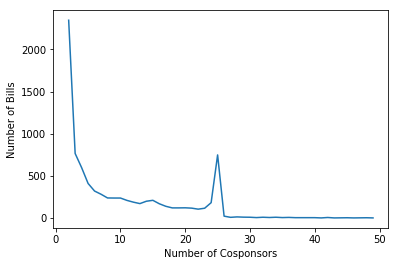

array([    0, 17752,  2347,   765,   597,   409,   319,   281,   237,
         236,   236,   208,   187,   170,   198,   209,   168,   138,
         119,   119,   120,   116,   104,   115,   181,   748,    21,
           7,    12,     9,     8,     4,     8,     5,     8,     4,
           6,     3,     3,     3,     3,     0,     5,     0,     1,
           2,     0,     1,     2,     0,     5,     1,     2,     1,
           1,     2,     0,     0,     1,     2,     1,     1,     1,
           1,     1,     0,     0,     1,     1,     1,     2,     1,
           0,     0,     0,     1,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     1])

In [31]:
plot_histogram(congress_df)

At what number of cosponsors are 90% bills included in that or less?

In [175]:
def plot_fraction_of_bills_by_cosponsors():
    for i in range(93, 115):
        df = pd.read_csv("data/govtrack_cosponsor_data/govtrack_cosponsor_data_" + str(i) + "_congress.csv")
        cosponsors_for_threshold = []
        threshold_range = np.arange(.5, 1, .05)
        for t in threshold_range:
            cosponsors_for_threshold.append(find_num_of_cosponsors(t * df.bill_number.unique().shape[0], plot_histogram(df, True)))
        plt.plot(threshold_range, cosponsors_for_threshold, label=i)
    plt.xlabel("Fraction of Bills")
    plt.ylabel("Number of Cosponsors")
    plt.title("Fraction of Bills by Cosponsor Number")
#     plt.legend()
    plt.savefig("plots/fraction_of_bills_by_cosponsors")
    plt.show()

/Users/emmaling/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2808: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


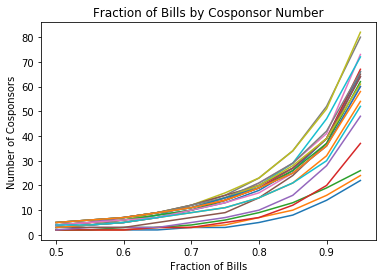

In [176]:
plot_fraction_of_bills_by_cosponsors()

In [33]:
bill_threshold = .8 * congress_df.bill_number.unique().shape[0]
bill_threshold

20977.600000000002

In [27]:
def find_num_of_cosponsors(t, arr): 
    i = 0
    while t > 0:
        t -= arr[i]
        i += 1
    return i

In [34]:
find_num_of_cosponsors(bill_threshold, plot_histogram(congress_df, True))

5

Want a dictionary `{person: [cosponsors in past]}`, note the graph does not include legislators who have not sponsored or cosponsored any bills yet - should do intersection of `legislators_93` and `legislators_94` later.

In [53]:
print(len(legislators_93))
print(len(thomas_ids))

547
547


# Get party affiliations

In [6]:
def get_last_name(name):
    return name['name'].split(",")[0].split(" ")[0].lower(), name['party']

In [7]:
def get_party_affiliations():
    house_affil = pd.read_csv("data/party_affiliation/house.csv")
    senate_affil = pd.read_csv("data/party_affiliation/senate.csv")
    party_affiliations = house_affil.append(senate_affil)
    party_affiliations = party_affiliations.apply(get_last_name, axis=1)
    party_affil_dict = {}
    for name, party in party_affiliations.unique():
        if party == 100:
            party_affil_dict[name] = "Democrat"
        elif party == 200:
            party_affil_dict[name] = "Republican"
    return party_affil_dict

# Make graph from cosponsorship data

In [8]:
def get_edges_from_lst(lst):
    edges = []
    for x in lst:
        for y in lst:
            if x != y and (x, y) not in edges and (y, x) not in edges:
                edges.append((x, y))
    return edges

In [9]:
def last_name(name):
    return name.split(",")[0].split(" ")[0].lower()

In [238]:
def make_graph(congress_df, party_affil_dict, date=None):
    g = nx.Graph()
    if date:
        congress_df = congress_df[congress_df.date_signed < date]
    for index, row in congress_df.iterrows():
        # Add edges from cosponsors to sponsors
        if not row.sponsor:
            sponsor = congress_df[(congress_df["bill_number"] == row["bill_number"]) & (congress_df["sponsor"] == True)].name
            if not sponsor.empty:
                sponsor_name = sponsor.values[0]
                if last_name(row['name']) in party_affil_dict.keys() and last_name(sponsor_name) in party_affil_dict.keys():
                    g.add_edge(row['name'], sponsor_name)
    return g

In [129]:
def get_bichromatic_ratio(g, party_affil_dict):
    bichromatic = 0
    for (x,y) in g.edges():
        if party_affil_dict[last_name(x)] != party_affil_dict[last_name(y)]:
            bichromatic += 1
    if g.number_of_edges() > 0:
        return bichromatic / g.number_of_edges()
    else:
        return 0

In [12]:
party_affil_dict = get_party_affiliations()

In [561]:
def get_edge_counts(g, party_affil_dict):
    maj_edges, min_edges, maj_min_edges, maj_nodes = 0, 0, 0, 0
    maj_party = get_majority(g, party_affil_dict)
    for (x,y) in g.edges():
        if party_affil_dict[last_name(x)] != party_affil_dict[last_name(y)]:
            maj_min_edges += 1
        elif party_affil_dict[last_name(x)] == maj_party:
            maj_edges += 1
        else:
            min_edges += 1
    for node in g.nodes():
        if party_affil_dict[last_name(node)] == maj_party:
            maj_nodes += 1
    return maj_edges, min_edges, maj_min_edges, maj_nodes

In [41]:
G_baseline = make_graph(congress_df, party_affil_dict)
print(G_baseline.number_of_nodes())
print(G_baseline.number_of_edges())

534
4489


In [99]:
congress_df[(congress_df.date_signed > date) & (congress_df.sponsor == False)].shape

(0, 10)

In [36]:
congress_df[congress_df.sponsor == True].shape

(21870, 10)

In [133]:
date = str(1787 + int(congress) * 2) + "-01-01"
G = make_graph(congress_df, party_affil_dict, date)

In [43]:
# plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [88]:
G.number_of_nodes()

0

In [89]:
G.number_of_edges()

0

In [186]:
def get_counts_over_time(g, congress_df, party_affil_dict, date):
    """Output b, f(w), f(d)"""
    congress_df = congress_df.sort_values("date_signed")
    w, w_b, d, d_b = 0, 0, 0, 0
    w_lst, w_b_lst, b_lst, d_lst, d_b_lst = [], [], [0], [], []
    last_date = date
    for index, row in congress_df[congress_df['date_signed'] >= date].iterrows():
        if not row.sponsor:
            sponsor = congress_df[(congress_df["bill_number"] == row["bill_number"]) & (congress_df["sponsor"] == True)].name
            if not sponsor.empty:
                sponsor_name = sponsor.values[0]
                if last_name(row['name']) in party_affil_dict.keys() and last_name(sponsor_name) in party_affil_dict.keys():
                    g.add_nodes_from([row['name'], sponsor_name])
                    if not g.has_edge(row['name'], sponsor_name):
                        if set(g.neighbors(row['name'])).intersection(set(g.neighbors(sponsor_name))):
                            if party_affil_dict[last_name(row['name'])] != party_affil_dict[last_name(sponsor_name)]:
                                w_b += 1
                            w += 1
                        else:
                            if party_affil_dict[last_name(row['name'])] != party_affil_dict[last_name(sponsor_name)]:
                                d_b += 1
                            d += 1
                        g.add_edge(row['name'], sponsor_name)
        this_date = row.date_signed
        if this_date != last_date:
            w_b_lst.append(w_b)
            w_lst.append(w)
            b_lst.append(get_bichromatic_ratio(g, party_affil_dict))
            d_b_lst.append(d_b)
            d_lst.append(d)
            last_date = this_date
    w_b_lst.append(w_b)
    w_lst.append(w)
    b_lst.append(get_bichromatic_ratio(g, party_affil_dict))
    d_b_lst.append(d_b)
    d_lst.append(d)
    return np.array(w_b_lst) , np.array(w_lst), np.array(b_lst[:-1]), np.array(d_b_lst), np.array(d_lst)

In [669]:
def plot_bichromatic_ratios_over_time(bichromatic_ratios, t):
    start_day = 100
    plt.plot(range(start_day, len(bichromatic_ratios)), bichromatic_ratios[start_day:])
    plt.xlabel("Time")
    plt.ylabel("Fraction of Bichromatic Edges")
    plt.title("Fraction of Bichromatic Edges Added Via Triadic Closure (House " + str(congress) + ")")
    plt.savefig("plots/bichromatic_closure_house_" + congress + "_start" + str(start_day) + "_t" + str(t))
    plt.show()

In [670]:
def plot_bichromatic_ratio_f_diff_over_time(b, f, t):
    start_day = 100
    plt.plot(range(start_day, len(b)), f[start_day:] - b[start_day:])
    plt.xlabel("Time")
    plt.ylabel("f_t - b_(t-1)")
    plt.title("f_t - b_(t-1), House " + str(congress))
    plt.savefig("plots/b_f_diff_house_" + congress + "_start" + str(start_day) + "_t" + str(t))
    plt.show()

In [671]:
def plot_w_d_ratios_over_time(f_w, f_d, t):
    start_day = 100
    plt.plot(range(start_day, len(f_w)), f_w[start_day:] / f_d[start_day:])
    plt.xlabel("Time")
    plt.ylabel("f(w) / f(d)")
    plt.title("f(w) / f(d) (House " + str(congress) + ")")
    plt.savefig("plots/w_d_ratio_house_" + congress + "_start" + str(start_day) + "_t" + str(t))
    plt.show()

In [682]:
def plot_d_ratios_over_time(f_d, t):
    start_day = 100
    plt.plot(range(start_day, len(f_d)), f_d[start_day:])
    plt.xlabel("Time")
    plt.ylabel("f(d)")
    plt.title("f(d) (House " + str(congress) + ")")
    plt.savefig("plots/d_ratio_house_" + congress + "_start" + str(start_day) + "_t" + str(t))
    plt.show()

In [686]:
def plot_w_d_separately_over_time(f_w, f_d, t):
    start_day = 100
    plt.plot(range(start_day, len(f_w)), f_w[start_day:], label="f(w)")
    plt.plot(range(start_day, len(f_w)), f_d[start_day:], label="f(d)")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Bichromatic Ratio")
    plt.title("Bichromatic Ratios by Closing Wedges (w) or not (d) (House " + str(congress) + ")")
    plt.savefig("plots/w_d_sep_house_" + congress + "_start" + str(start_day) + "_t" + str(t))
    plt.show()

/Users/emmaling/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


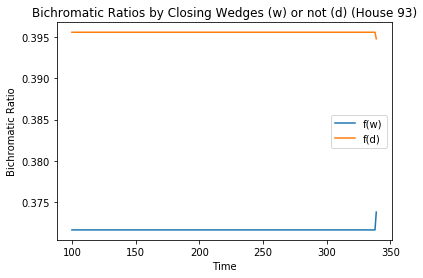

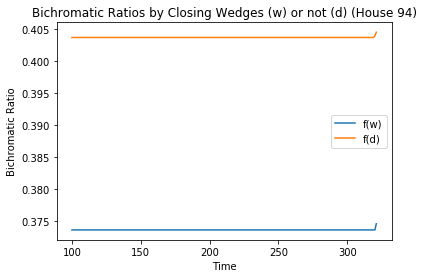

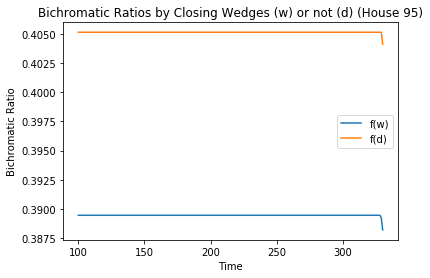

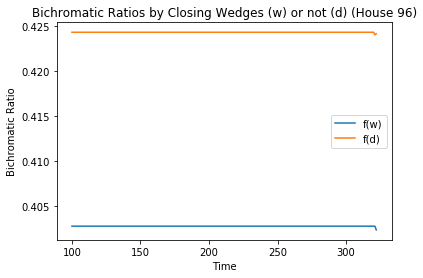

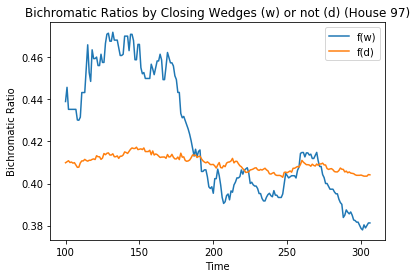

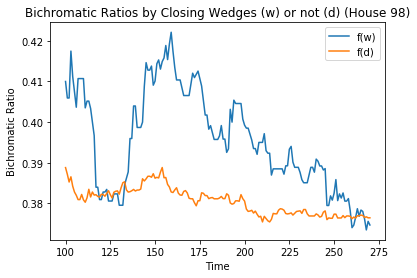

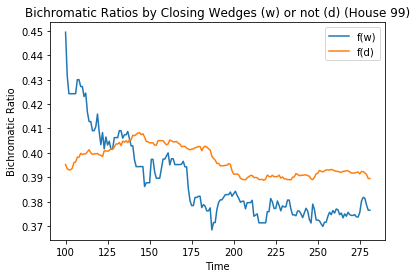

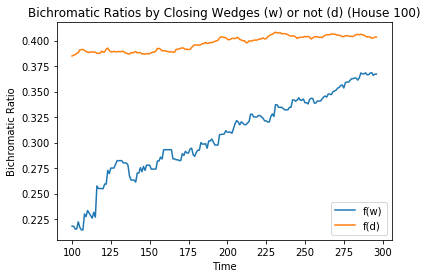

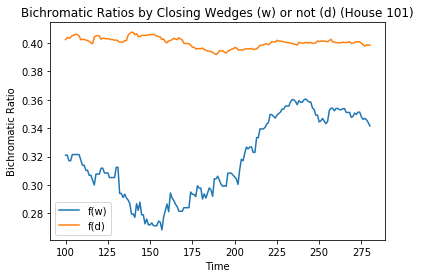

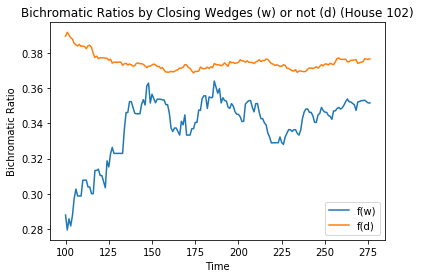

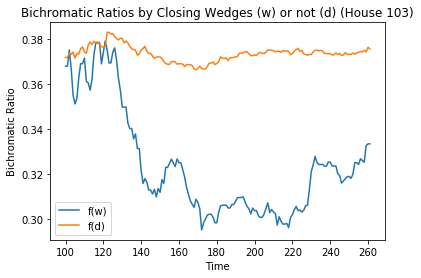

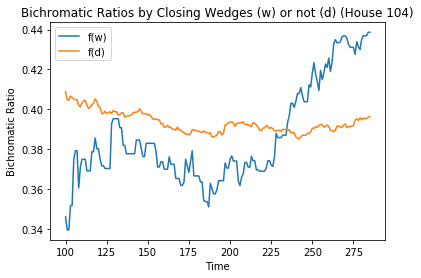

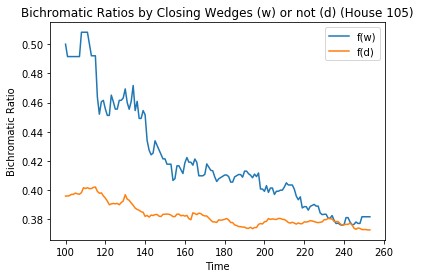

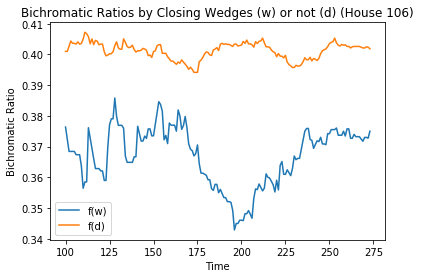

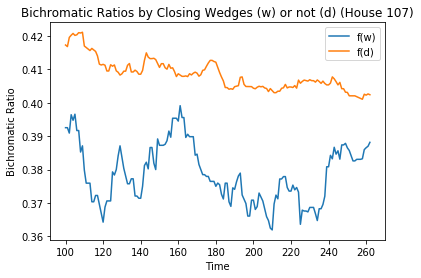

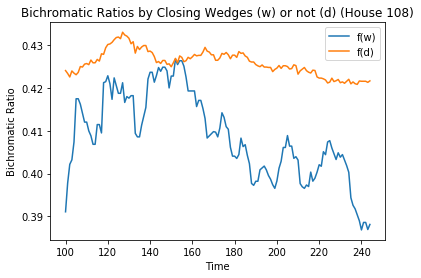

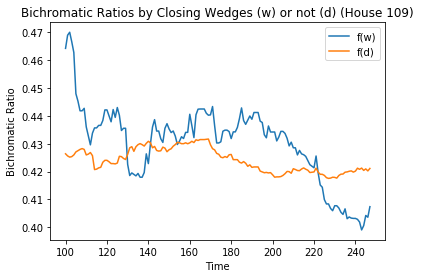

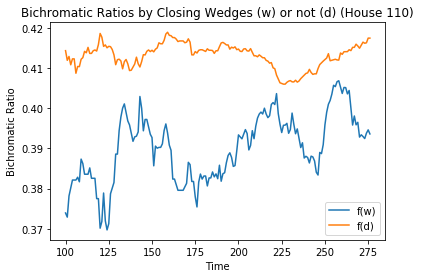

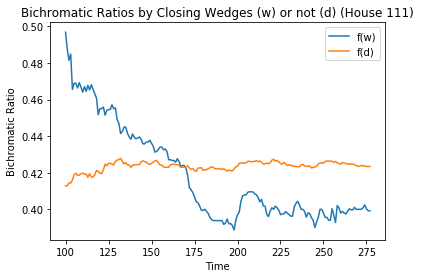

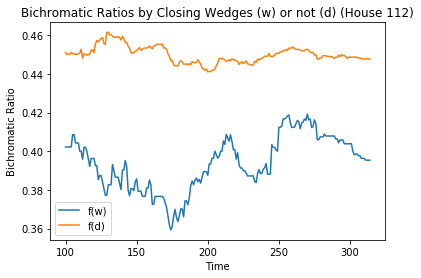

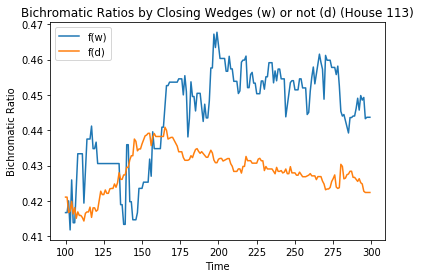

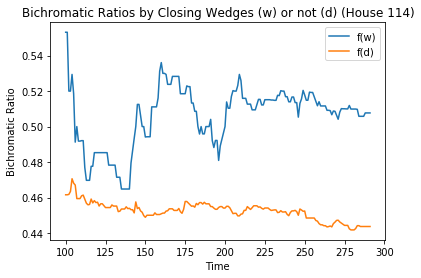

In [687]:
t = 5
for congress in range(93, 115):
    congress = str(congress)
    congress_df = pd.read_csv("data/below_" + str(t) + "_cosponsors/congress_" + str(congress) + "_house.csv")
    date = str(1787 + int(congress) * 2) + "-01-01"
    G = make_graph(congress_df, party_affil_dict, date)
    bichromatic_ratios = get_counts_over_time(G, congress_df, party_affil_dict, date)
    plot_bichromatic_ratios_over_time(bichromatic_ratios[0] / bichromatic_ratios[1], t)
    plot_bichromatic_ratio_f_diff_over_time(bichromatic_ratios[2], bichromatic_ratios[0] / bichromatic_ratios[1], t)
    plot_w_d_ratios_over_time(bichromatic_ratios[0] / bichromatic_ratios[1], bichromatic_ratios[3] / bichromatic_ratios[4], t)
    plot_d_ratios_over_time(bichromatic_ratios[3] / bichromatic_ratios[4], t)
    plot_w_d_separately_over_time(bichromatic_ratios[0] / bichromatic_ratios[1], bichromatic_ratios[3] / bichromatic_ratios[4], t)

In [101]:
def close_wedges_simultaneously(g, n):
    edges_to_add = []
    while (len(edges_to_add) < n):
        node = list(g.nodes())[np.random.randint(0, g.number_of_nodes())]
        friends = set(nx.all_neighbors(g, node))
        if len(friends) > 0:
            friend = random.sample(friends, 1)[0]
            new_possible_friends = set(nx.all_neighbors(g, friend)).difference(set(nx.all_neighbors(g, node)))
            if len(new_possible_friends) > 0:
                new_friend = random.sample(new_possible_friends, 1)[0]
                edges_to_add.append((node, new_friend))
    g.add_edges_from(edges_to_add)
    return g

In [108]:
g_closed = close_wedges_simultaneously(G, 1000)

In [126]:
get_bichromatic_ratio(g_closed, party_affil_dict)

0.46880785292978

In [137]:
bichromatic_ratios = [get_bichromatic_ratio(G, party_affil_dict)]
for _ in range(10):
    bichromatic_ratios.append(get_bichromatic_ratio(close_wedges_simultaneously(G, 100), party_affil_dict))

In [138]:
bichromatic_ratios

[0.41429543907420013,
 0.41490933512424444,
 0.4148442677269715,
 0.41588173731030875,
 0.4161931818181818,
 0.41675165731769503,
 0.41734860883797054,
 0.41787890090762153,
 0.41827336362519957,
 0.4190222006551013,
 0.4183147548843342]

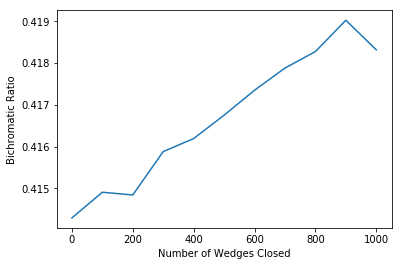

In [143]:
plt.plot(range(0, 1100, 100), bichromatic_ratios)
plt.xlabel("Number of Wedges Closed")
plt.ylabel("Bichromatic Ratio")
plt.show()

In [275]:
def get_centrality_types():
    return {
        "Degree": centrality.degree_centrality,
        "Eigenvector": centrality.eigenvector_centrality,
#         "Katz": centrality.katz_centrality,
        "Closeness": centrality.closeness_centrality,
#         "Flow-Closeness": centrality.current_flow_closeness_centrality,
        "Betweenness": centrality.betweenness_centrality,
#         "Flow-Betweenness": centrality.current_flow_betweenness_centrality
    }

In [276]:
def get_majority(G, party_affil_dict):
    count = 0
    for node in G.nodes():
        if party_affil_dict[last_name(node)] == "Democrat":
            count += 1
        elif party_affil_dict[last_name(node)] == "Republican":
            count -= 1
    if count > 0:
        return "Democrat"
    else:
        return "Republican"

In [277]:
get_majority(G, party_affil_dict)

'Republican'

In [540]:
def clean_data_below_threshold(t):
    for congress in range(93, 115):
        congress_df = pd.read_csv("data/govtrack_cosponsor_data/govtrack_cosponsor_data_" + str(congress) + "_congress.csv")
        congress_df = congress_df[congress_df.district.notnull()]
        congress_df = below_threshold_df(congress_df, t)
        try:
            os.mkdir("data/below_" + str(t) + "_cosponsors")
        except:
            print("directory data/below_" + str(t) + "_cosponsors already exists")
        congress_df.to_csv("data/below_" + str(t) + "_cosponsors/congress_" + str(congress) + "_house.csv")

In [541]:
clean_data_below_threshold(10)

directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists


/Users/emmaling/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2808: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists
directory data/below_10_cosponsors already exists


In [542]:
def build_house_graphs(t):
    for congress in range(93, 115):
        congress_df = pd.read_csv("data/below_" + str(t) + "_cosponsors/congress_" + str(congress) + "_house.csv")
        G = make_graph(congress_df, party_affil_dict)
        write_gpickle(G, "data/graphs/congress_" + str(congress) + "_below_" + str(t) + "_house.pkl")

In [543]:
build_house_graphs(10)

In [544]:
t

5

In [590]:
np.array([norm.interval(.95, 0, 1), norm.interval(.95, 0, 1), norm.interval(.95, 0, 1)]).T

array([[-1.95996398, -1.95996398, -1.95996398],
       [ 1.95996398,  1.95996398,  1.95996398]])

In [640]:
norm.interval(.95, 10 - 1, 1)

(7.040036015459946, 10.959963984540053)

In [627]:
# def conf_interval(arr):
#     return norm.interval(.95, np.average(arr), sqrt(np.var(arr)))

In [673]:
def ave_centrality(party_affil_dict, centrality_type, t):
    """
    Returns mean centrality for majority, minority, majority ratios, majority parties, 
    confidence intervals for maj and min centralities
    """
    majority_ratio, ave_maj_centrality, ave_min_centrality, maj_parties, diff_conf_int = [], [], [], [], []
    alpha = .95
    for congress in range(93, 115):
        G = read_gpickle("data/graphs/congress_" + str(congress) + "_below_" + str(t) + "_house.pkl")
        maj_party = get_majority(G, party_affil_dict)
        try:
            centrality_dict = get_centrality_types()[centrality_type](G)
            maj_parties.append(maj_party)
            maj_centralities = []
            min_centralities = []
            for cosponsor in centrality_dict:
                if party_affil_dict[last_name(cosponsor)] == maj_party:
                    maj_centralities.append(centrality_dict[cosponsor])
                else:
                    min_centralities.append(centrality_dict[cosponsor])
            ave_maj_cent = np.average(maj_centralities)
            ave_min_cent = np.average(min_centralities)
            ave_maj_centrality.append(ave_maj_cent)
            ave_min_centrality.append(ave_min_cent)
            majority_ratio.append(len(maj_centralities) / (len(maj_centralities) + len(min_centralities)))
            diff_conf_int.append(norm.interval(alpha, ave_maj_cent - ave_min_cent, sqrt(np.var(maj_centralities) + np.var(min_centralities))))
        except:
            print("error on congress " + str(congress))
            
#     print(np.array(ave_maj_centrality) - np.array(ave_min_centrality))
#     print(np.array(diff_conf_int))
#     print(np.array(diff_conf_int)[:, 0] - (np.array(ave_maj_centrality) - np.array(ave_min_centrality)))
#     print(np.array(diff_conf_int)[:, 1] - (np.array(ave_maj_centrality) - np.array(ave_min_centrality)))

    return np.array(ave_maj_centrality), np.array(ave_min_centrality), np.array(majority_ratio), np.array(maj_parties), np.array(diff_conf_int)

In [668]:
ave_centralities = ave_centrality(party_affil_dict, "Eigenvector")

[ 0.00978283  0.00735108 -0.00053577 -0.0090534   0.00173451  0.00322397
  0.00585495 -0.00150929  0.00311414  0.00058906  0.00032775  0.00208468
  0.00100475  0.00233709 -0.0011994  -0.00343975 -0.00584685 -0.00987673
  0.01423047  0.02162772 -0.01657388  0.01120027]
[[-0.03007149  0.04963715]
 [-0.02919627  0.04389843]
 [-0.03423535  0.03316381]
 [-0.04478398  0.02667717]
 [-0.0331918   0.03666083]
 [-0.03124331  0.03769124]
 [-0.02770922  0.03941912]
 [-0.03620425  0.03318566]
 [-0.03019303  0.03642132]
 [-0.03240972  0.03358784]
 [-0.0351214   0.0357769 ]
 [-0.03674635  0.04091571]
 [-0.0366744   0.03868389]
 [-0.03216433  0.03683851]
 [-0.03526149  0.03286269]
 [-0.04066721  0.03378771]
 [-0.04134733  0.02965363]
 [-0.04805467  0.0283012 ]
 [-0.02526987  0.05373082]
 [-0.02542411  0.06867956]
 [-0.06889443  0.03574668]
 [-0.03756322  0.05996376]]
[-0.03985432 -0.03654735 -0.03369958 -0.03573058 -0.03492632 -0.03446728
 -0.03356417 -0.03469496 -0.03330717 -0.03299878 -0.03544915 -0

In [608]:
conf_intervals = ave_centralities[4] - ave_centralities[5]

array([[ -9.79671603e-03,   1.70501888e-02],
       [ -6.49185476e-03,   1.25266052e-02],
       [  3.35529200e-03,  -9.04233476e-03],
       [ -9.45064587e-04,  -6.04179672e-03],
       [ -2.96164210e-03,   3.12084259e-03],
       [ -4.82458202e-03,   4.85644020e-03],
       [ -6.01611179e-03,   7.29733188e-03],
       [  1.98652048e-03,  -1.52509865e-03],
       [ -2.91894728e-03,   2.20041075e-03],
       [ -1.36694113e-03,  -9.34984118e-04],
       [  9.01710590e-04,  -1.00012624e-03],
       [ -9.74131653e-04,   6.96030869e-04],
       [ -2.52652034e-03,   3.59062513e-03],
       [ -1.51664842e-03,   2.76401685e-03],
       [  3.79780133e-04,   2.12261141e-04],
       [  2.87794207e-05,   1.07282668e-03],
       [ -1.89896890e-03,   6.65418242e-04],
       [ -3.02064531e-03,  -6.15549797e-03],
       [ -2.28320250e-03,   1.26744844e-02],
       [ -7.85276537e-03,   2.25698832e-02],
       [  3.19918056e-03,  -1.39342170e-02],
       [  1.08087629e-03,   7.73515575e-03]])

In [674]:
def plot_centralities(ave_centralities, centrality_type, t):
    plt.scatter(ave_centralities[2], ave_centralities[0], label="majority")
    plt.scatter(ave_centralities[2], ave_centralities[1], label="minority")
    plt.xlabel("Majority Ratio")
    plt.ylabel("Average " + centrality_type + " Centrality")
    plt.legend()
    plt.title("Average " + centrality_type + " Centrality of Majority and Minority in the House")
    plt.savefig("plots/" + centrality_type + "_centrality_houses" + "_t" + str(t))
    plt.show()

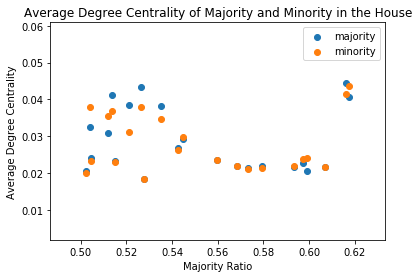

In [358]:
cent = "Degree"
plot_centralities(ave_centrality(party_affil_dict, cent), cent)

In [675]:
def plot_centrality_diff(ave_centralities, centrality_type, t):
    plt.scatter(ave_centralities[2][ave_centralities[3]=='Democrat'], ave_centralities[0][ave_centralities[3]=='Democrat'] - ave_centralities[1][ave_centralities[3]=='Democrat'], label="Democrat majority")
    plt.scatter(ave_centralities[2][ave_centralities[3]=='Republican'], ave_centralities[0][ave_centralities[3]=='Republican'] - ave_centralities[1][ave_centralities[3]=='Republican'], label="Republican majority")
    coeff_dem = np.polyfit(ave_centralities[2][ave_centralities[3]=='Democrat'], ave_centralities[0][ave_centralities[3]=='Democrat'] - ave_centralities[1][ave_centralities[3]=='Democrat'], 1)
    predict_dem = np.poly1d(coeff_dem)
    plt.plot(ave_centralities[2][ave_centralities[3]=='Democrat'], predict_dem(ave_centralities[2][ave_centralities[3]=='Democrat']), label="Democrat best fit")
    coeff_rep = np.polyfit(ave_centralities[2][ave_centralities[3]=='Republican'], ave_centralities[0][ave_centralities[3]=='Republican'] - ave_centralities[1][ave_centralities[3]=='Republican'], 1)
    predict_rep = np.poly1d(coeff_rep)
    plt.plot(ave_centralities[2][ave_centralities[3]=='Republican'], predict_rep(ave_centralities[2][ave_centralities[3]=='Republican']), label="Republican best fit")
    plt.xlabel("Majority Ratio")
    plt.ylabel("Average " + centrality_type + " Centrality Difference")
    plt.legend()
    plt.title("Average " + centrality_type + " Centrality Difference between Majority and Minority in Houses")
    plt.savefig("plots/" + centrality_type + "_centrality_diff_houses" + "_t" + str(t))
    plt.show()

In [398]:
def centrality_diff(ave_centralities, party, edge_node_ratios):
    return (1 / edge_node_ratios)[ave_centralities[3] == party] * (ave_centralities[0][ave_centralities[3] == party] - ave_centralities[1][ave_centralities[3] == party])

In [511]:
def get_ave_value(key_range, d):
    values = []
    for key in key_range:
        values.append(d[key])
    return np.average(values)

In [527]:
[3,2].sort()

In [680]:
%matplotlib inline
def plot_centrality_diff_adjusted(ave_centralities, centrality_type, g_data, g_data_ave, t):

    # Centrality difference by political party
    edge_node_ratios = g_data['n_edges'] / g_data['n_nodes']
    dem_diff = centrality_diff(ave_centralities, "Democrat", edge_node_ratios)
    rep_diff = centrality_diff(ave_centralities, "Republican", edge_node_ratios)
    plt.scatter(ave_centralities[2][ave_centralities[3]=='Democrat'], dem_diff, label="Democrat majority")
    plt.scatter(ave_centralities[2][ave_centralities[3]=='Republican'], rep_diff, label="Republican majority")
    coeff_dem = np.polyfit(ave_centralities[2][ave_centralities[3]=='Democrat'], dem_diff, 1)
    predict_dem = np.poly1d(coeff_dem)
    plt.plot(ave_centralities[2][ave_centralities[3]=='Democrat'], predict_dem(ave_centralities[2][ave_centralities[3]=='Democrat']), label="Democrat best fit")
    coeff_rep = np.polyfit(ave_centralities[2][ave_centralities[3]=='Republican'], rep_diff, 1)
    predict_rep = np.poly1d(coeff_rep)
    plt.plot(ave_centralities[2][ave_centralities[3]=='Republican'], predict_rep(ave_centralities[2][ave_centralities[3]=='Republican']), label="Republican best fit")
    # Error bars
#     plt.errorbar(ave_centralities[2],
#                  ave_centralities[0] - ave_centralities[1],
#                  yerr=ave_centralities[4].T, fmt='none')
    
    # Stochastic block model
    ave_nodes = np.average(g_data['n_nodes'])
    maj_ave_centrality = []
    min_ave_centrality = []
    maj_ratios = ave_centralities[2]
    maj_ratios.sort()
    probs = [[g_data_ave['p_maj'], g_data_ave['q']], [g_data_ave['q'], g_data_ave['p_min']]]
    for m in maj_ratios:
        size_maj = int(m * ave_nodes)
        size_min = int(ave_nodes - size_maj)
        maj_cents = []
        min_cents = []
        for seed in range(20):
            g = nx.generators.community.stochastic_block_model([size_maj, size_min], probs, seed=seed)
            node_centrality = get_centrality_types()[centrality_type](g)
            maj_cents.append(get_ave_value(range(size_maj), node_centrality))
            min_cents.append(get_ave_value(range(size_maj, int(ave_nodes)), node_centrality))
        maj_ave_centrality.append(np.average(maj_cents))
        min_ave_centrality.append(np.average(min_cents))
    plt.plot(maj_ratios, np.array(maj_ave_centrality) - np.array(min_ave_centrality), label="SBM")
    plt.xlabel("Majority Ratio")
    plt.ylabel("Average " + centrality_type + " Centrality Difference")
    plt.legend()
    plt.title("Adjusted Average " + centrality_type + " Centrality Difference between Majority and Minority in Houses")
    plt.savefig("plots/" + centrality_type + "_centrality_diff_houses_adjusted" + "_t" + str(t))
    plt.show()

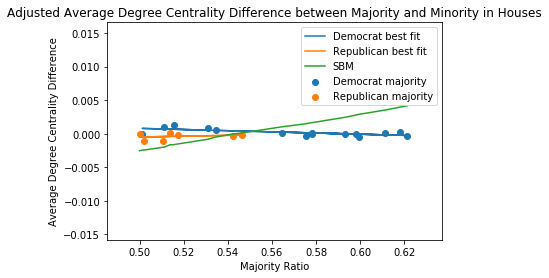

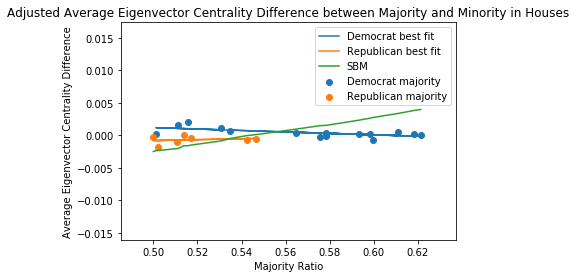

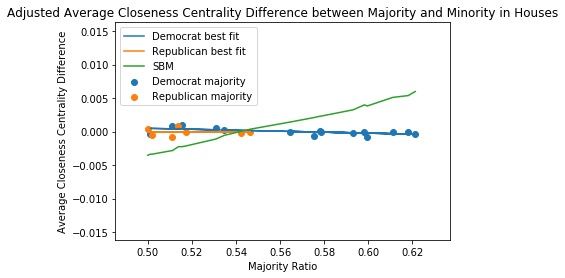

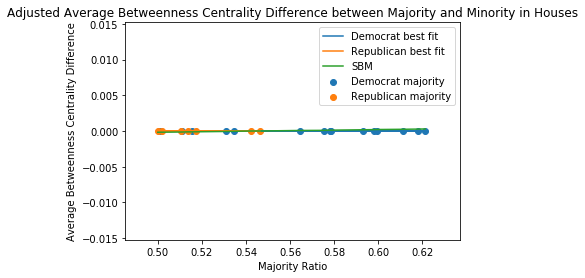

In [681]:
t = 10
g_data, g_data_ave = get_ave_g_data(party_affil_dict, t)
for cent in get_centrality_types():
    plot_centrality_diff_adjusted(ave_centrality(party_affil_dict, cent, t), cent, g_data, g_data_ave, t)

In [678]:
def get_ave_g_data(party_affil_dict, t):
    ratios = []
    n_edges = []
    n_nodes = []
    p_majs = []
    p_mins = []
    qs = []
    for congress in range(93, 115):
#         print(congress)
        g = read_gpickle("data/graphs/congress_" + str(congress) + "_below_" + str(t) + "_house.pkl")
        maj_edges, min_edges, maj_min_edges, maj_nodes = get_edge_counts(g, party_affil_dict)
#         print(maj_edges, min_edges, maj_min_edges, maj_nodes)
        p_maj = maj_edges / comb(maj_nodes, 2)
        p_min = min_edges / comb(g.number_of_nodes() - maj_nodes, 2)
        q = maj_min_edges / (maj_nodes * (g.number_of_nodes() - maj_nodes))
        p_majs.append(p_maj)
        p_mins.append(p_min)
        qs.append(q)
        ratios.append(get_bichromatic_ratio(g, party_affil_dict))
        n_edges.append(g.number_of_edges())
        n_nodes.append(g.number_of_nodes())
    g_data_ave = {
        'bichromatic_ratio': np.average(ratios),
        'n_edges': np.average(n_edges),
        'n_nodes': np.average(n_nodes),
        'q': np.average(qs),
        'p_maj': np.average(p_majs),
        'p_min': np.average(p_mins)
    }
    g_data = {
        'bichromatic_ratio': np.array(ratios),
        'n_edges': np.array(n_edges),
        'n_nodes': np.array(n_nodes),
        'qs': qs,
        'p_majs': p_majs,
        'p_mins': p_mins
    }
    return g_data, g_data_ave

In [575]:
g_data, g_data_ave = get_ave_g_data(party_affil_dict)
g_data

{'bichromatic_ratio': array([ 0.38592814,  0.39078156,  0.39729237,  0.41861648,  0.39835828,
         0.3760903 ,  0.38665972,  0.39536138,  0.38558468,  0.3708452 ,
         0.36607595,  0.40516698,  0.37473118,  0.39548023,  0.39887112,
         0.41171513,  0.41719881,  0.4092901 ,  0.41479714,  0.43172119,
         0.42816092,  0.46097815]),
 'n_edges': array([3340, 3992, 3841, 1966, 2071, 1949, 1919, 1854, 1984, 2106, 1975,
        1587, 1860, 2124, 2126, 2373, 2349, 2282, 2095, 1406, 1044,  961]),
 'n_nodes': array([428, 430, 429, 424, 420, 425, 421, 417, 428, 427, 424, 415, 428,
        424, 429, 424, 400, 371, 321, 284, 244, 222]),
 'p_majs': [0.046924078755841571,
  0.049914236706689534,
  0.044253859348198969,
  0.021505710995611715,
  0.027204946353882525,
  0.02464332036316472,
  0.025467179383390676,
  0.024647515910129741,
  0.024493479816999161,
  0.025999691215068704,
  0.026279391424619641,
  0.021490511499308786,
  0.025994349054553358,
  0.029222061340002634,
  0.02

In [564]:
g_data_ave

{'p_maj': 0.032900226017372393,
 'p_min': 0.034479608857794018,
 'q': 0.02323365059977435}

In [390]:
edge_node_ratios = g_data['n_edges'] / g_data['n_nodes']

In [391]:
1 / edge_node_ratios

array([ 0.12814371,  0.10771543,  0.11168966,  0.21566633,  0.20280058,
        0.21806054,  0.2193851 ,  0.22491909,  0.21572581,  0.20275404,
        0.21468354,  0.26149968,  0.23010753,  0.19962335,  0.20178739,
        0.17867678,  0.17028523,  0.16257669,  0.15322196,  0.20199147,
        0.23371648,  0.23100937])

In [409]:
g = nx.generators.community.stochastic_block_model([500, 500], [[.1, .1], [.1, .1]], seed=1)

total nodes * (p(maj) + q(min)) / 2 = edges <br>
p = ratio * q/ (1-ratio)

total nodes * (p) * total nodes / 2 = edges

In [417]:
1000 * .1 * 1000 / 2

50000.0

In [410]:
g.number_of_edges()

50114

In [415]:
g.number_of_nodes() / g.number_of_edges()

0.0199545037314922

In [503]:
r = g_data_ave['bichromatic_ratio']
e = g_data_ave['n_edges']
m = np.average(ave_centralities[2])
n = g_data_ave['n_nodes']
print(r, e, m, n)

0.400895682456 2145.63636364 0.54545138993 392.5


In [504]:
q = 2 * e * (1-r) / (r + 2*m - 2*m**2)/ n ** 2 
p = r * q / (1 - r)
print(p, q)

0.0124525987941 0.0186093440979


In [572]:
probs = [[g_data_ave['p_maj'], g_data_ave['q']], [g_data_ave['q'], g_data_ave['p_min']]]
g = nx.generators.community.stochastic_block_model([int(round(m * n)), int(round((1-m) * n))], probs, seed=1)

In [573]:
g.number_of_edges()

2281

In [507]:
def predicted_edges(m, p, q, n):
    return n**2 * (m * (p * m + q * (1-m)) + (1-m) * (p * (1-m) + q * m)) / 2

In [508]:
predicted_edges(m, p, q, n)

1194.3622020478524

In [509]:
def test_edges():
#     m = .7
#     p = .02
#     q = .01
#     n = 100
    results = []
    for _ in range(50):
        g = nx.generators.community.stochastic_block_model([int(round(m * n)), int(round((1-m) * n))], [[p, q], [q, p]])
        results.append((predicted_edges(m, p, q, n) - g.number_of_edges()) / g.number_of_edges())
    print(np.average(results))

In [510]:
test_edges()

0.00664021431705


In [594]:
sqrt(4)

2.0